Щербаков Павел, гр. 3825М1ПМвм1

<a id='-1'></a>
**Меню**:

0. [Описать задачу словами](#0)
1. [Прочитать данные](#1)
2. [Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.](#2)
3. [Обработать пропущенные значения (или убедиться, что их нет)](#3)
4. [Обработать категориальные признаки](#4)
5. [Провести нормализацию (или объяснить, почему в вашем случае она не нужна)](#5)
6. [Разбить данные на обучающую и тестовую выборки](#6)
7. [Запустить классификатор (регрессию) ближайших соседей или другой метод (аргументируйте выбор!)](#7)
8. [Выводы](#10)

<a id='0'></a>
0. *Описать задачу словами*. 
Решается задача классификации клиентов по данным португальского банка. 
Банк хочет знать, оформит ли клиент срочный вклад после общения с ним в новую кампанию. 
[Обратно в меню](#-1)

- Объём данных N = $41188$
- Количество признаков d = $20$
- Число классов K = $2$

[Тип признаков](#11)

<a id='1'></a>
1. *Прочитать данные* [Обратно в меню](#-1)

In [5]:
# импортируем необходимые библиотеки
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn

Загрузим наши данные

In [7]:
raw_data = pd.read_csv("data.txt",sep=";")

In [8]:
raw_data.shape

(41188, 21)

In [9]:
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
raw_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [11]:
raw_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<a id='11'></a>
[Обратно в меню](#-1)
Тип признаков:
- age (возраст), *число*
- job (тип работы), *категория*
- marital (личные отношения), *категория*
- education (образование), *категория*
- default (объявлял банкротство?), *категория*
- housing (есть ли долг по недвижимости), *категория*
- loan (есть ли личный долг), *категория*
- contact (как с ним контактировали - мобильный или домашний телефон), *категория*
- month (последний месяц, когда контактировали), *категория*
- day_of_week (последний день недели, когда контактировали), *категория*
- duration (длительность последнего контакта в секундах), *число*
- campaign (сколько контактов с ним было в текущую кампанию), *число*
- pdays (сколько прошло дней с момента когда последний раз был контакт в предыдущую кампанию), *число* !! равно $999$, если раньше не было контакта
- previous (сколько контактов было с клиентом до текущей кампании), *число*
- poutcome (итог предыдущей кампании), *категория*
- emp.var.rate (изменение уровня занятости за квартал. Он рассчитывается как процентное изменение количества занятых лиц в сравнении с предыдущим кварталом), *число*
- cons.price.idx (изменение уровня цен на товары и услуги, приобретаемые населением, за месяц. Он рассчитывается как средневзвешенная величина изменения цен на корзину товаров и услуг, которая включает в себя основные категории расходов домохозяйств, такие как продукты питания, жилье, одежда, транспорт и т.д.), *число*
- cons.conf.idx (отражает уровень оптимизма или пессимизма потребителей относительно текущей и будущей экономической ситуации. Он рассчитывается на основе опросов домохозяйств), *число*
- euribor3m(Euro Interbank Offered Rate - это показатель, который отражает среднюю ставку, по которой банки Европейского союза готовы предоставлять кредиты друг другу на короткие сроки, обычно от 1 дня до 1 года), *число*
- nr.employed (количество работников банка), *число*
- y (**предсказываем**: согласился клиент положить деньги на срочный вклад в банк или нет), *категория*

столбец *duration* мы сразу выкинем по следующей причине: если duration = 0, то очевидно y = "no", а при duration > 0 в конце звонка значение y уже известно

In [14]:
raw_data = raw_data.drop("duration",axis = 1)

<a id='2'></a>
2. *Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.*
[Обратно в меню](#-1)

Посмотрим, как выглядят зависимости

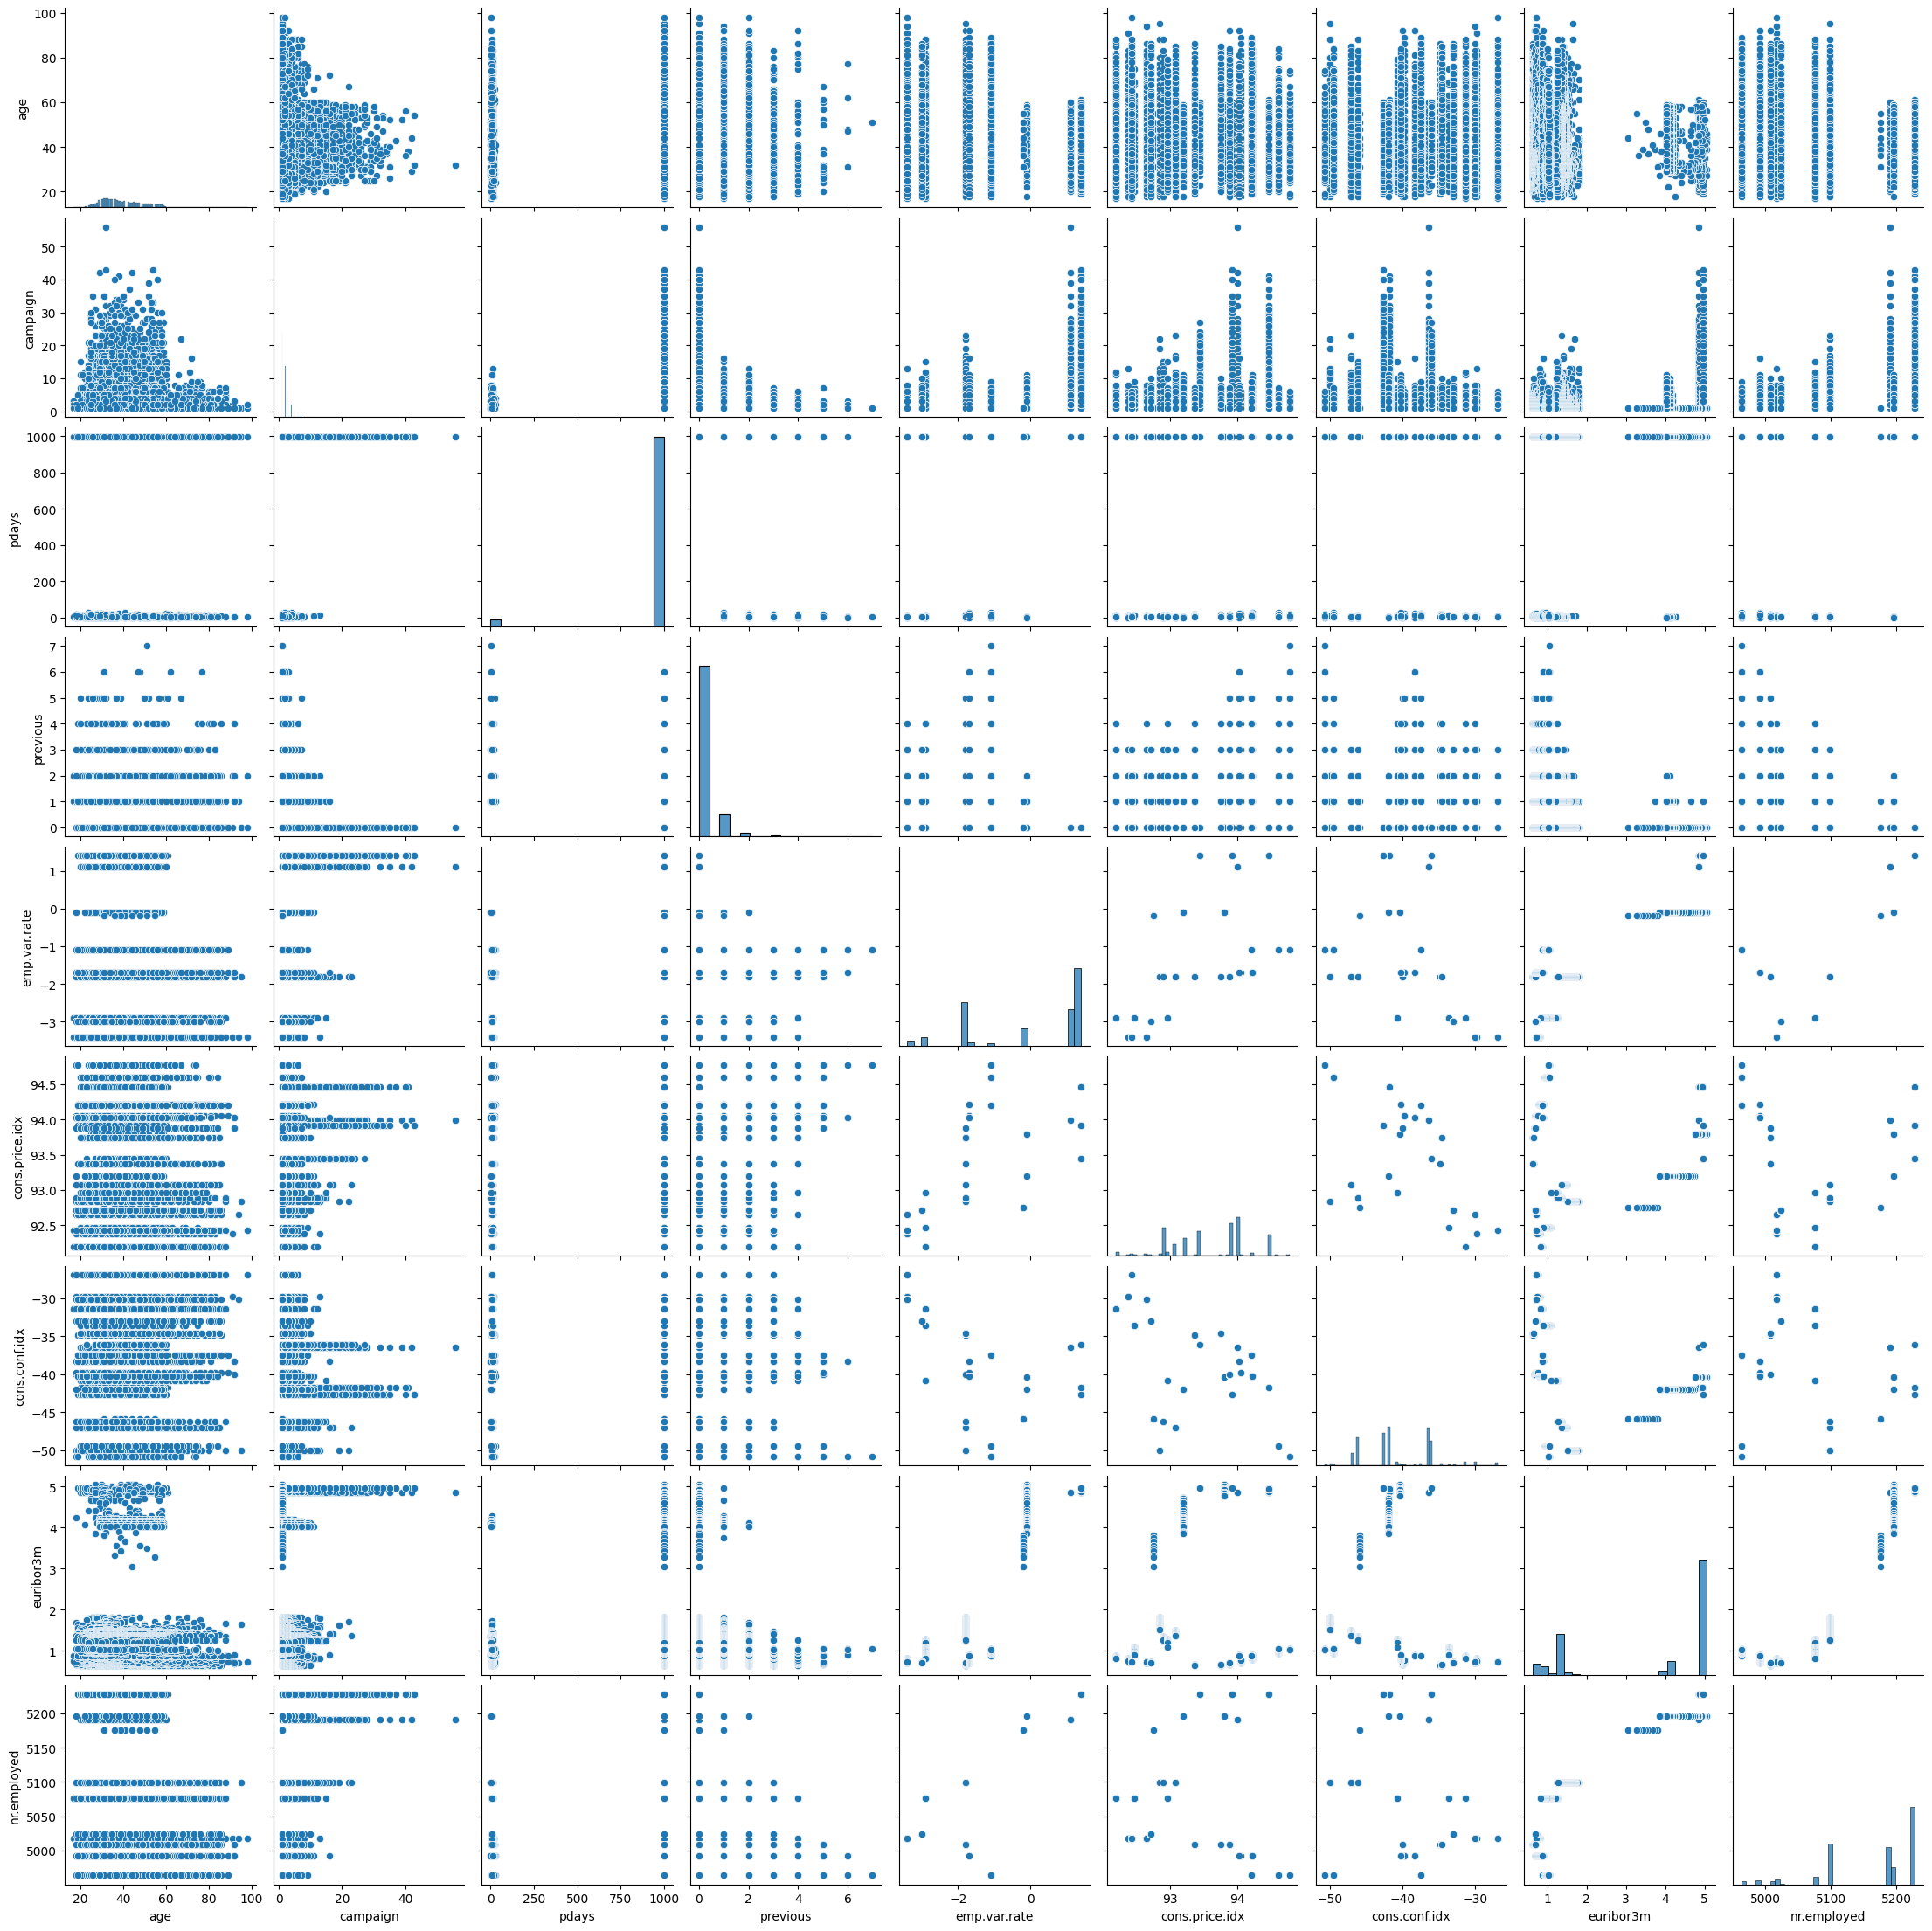

In [17]:
sns.pairplot(raw_data)

Построим гистограмму и вычислим описательную статистику для каждого числового показателя

<Axes: xlabel='age', ylabel='Count'>

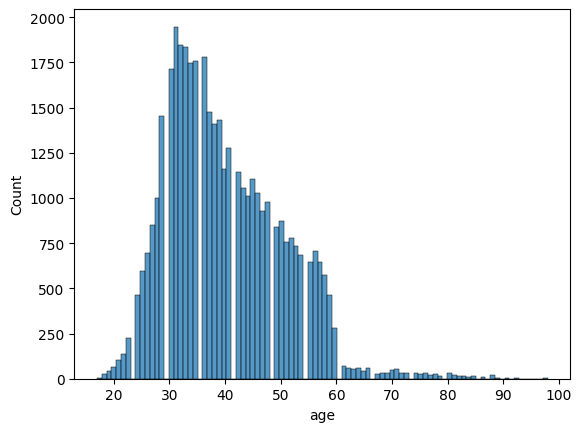

In [19]:
sns.histplot(raw_data['age'])

<Axes: ylabel='age'>

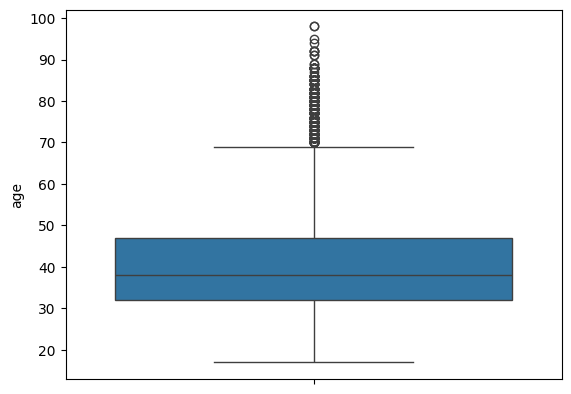

In [20]:
sns.boxplot(raw_data['age'])

In [21]:
raw_data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Видим: основное количество звонков приходится на **работающих** людей возраста около $40$ лет. Людям на пенсии они почти не звонили. 
Почему-то не представлены возрасты, кратные какому-то фиксированному числу, -- пока не очень понятно, как это можно объяснить.

In [23]:
raw_data['age'].quantile(0.99)

71.0

99% меньше 70 лет. Режем по этому значению

In [25]:
raw_data = raw_data[raw_data['age'] < 70.0]

<Axes: ylabel='age'>

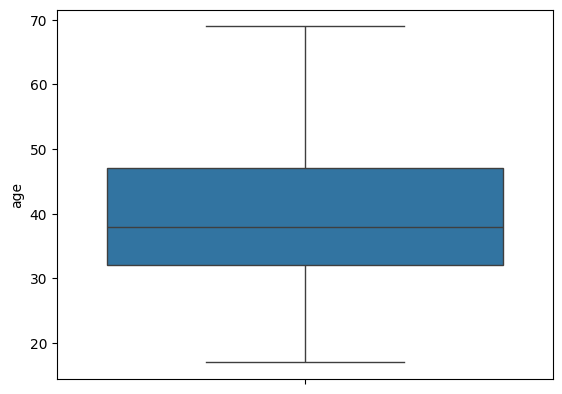

In [26]:
sns.boxplot(raw_data['age'])

<Axes: xlabel='campaign', ylabel='Count'>

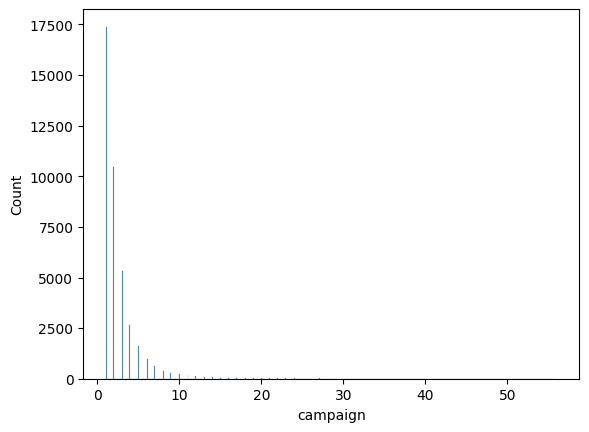

In [27]:
sns.histplot(raw_data['campaign'])

<Axes: ylabel='campaign'>

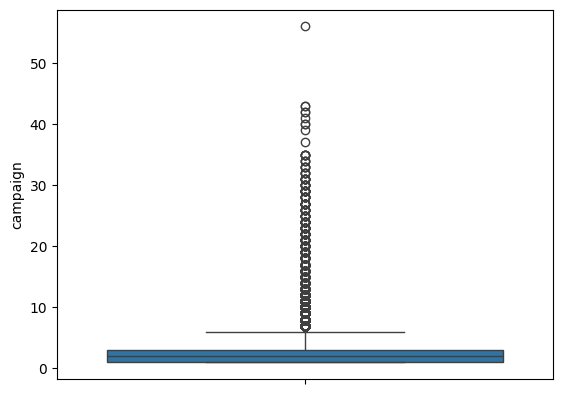

In [28]:
sns.boxplot(raw_data['campaign'])

In [29]:
raw_data['campaign'].describe()

count    40719.000000
mean         2.574818
std          2.779474
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

Видим: основное число звонков приходится на $2-3$ кампании и лишь малая их часть на последующие (образуют длинный хвост)

In [31]:
raw_data['campaign'].quantile(0.95)

7.0

95% меньше 7. Уберём хвост

In [33]:
raw_data = raw_data[raw_data['campaign'] < 7]

<Axes: ylabel='campaign'>

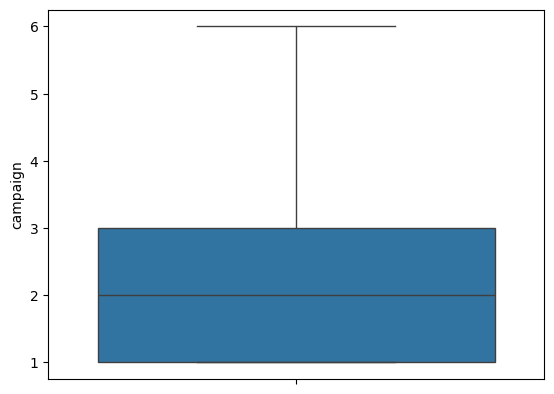

In [34]:
sns.boxplot(raw_data['campaign'])

<Axes: xlabel='pdays', ylabel='Count'>

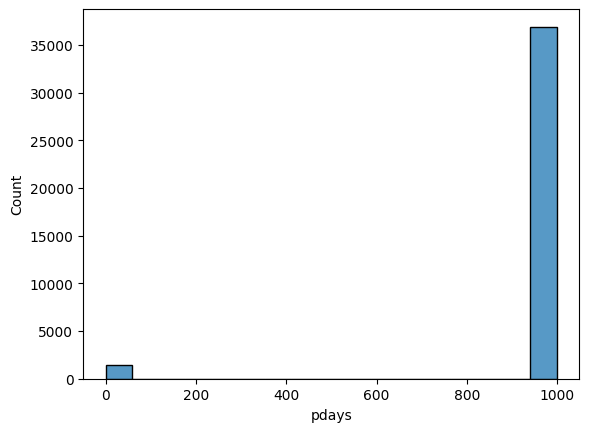

In [35]:
sns.histplot(raw_data['pdays'])

<Axes: ylabel='pdays'>

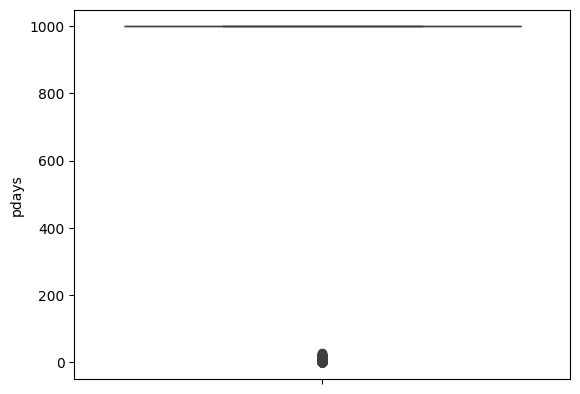

In [36]:
sns.boxplot(raw_data['pdays'])

In [37]:
raw_data['pdays'].describe()

count    38327.000000
mean       962.677877
std        186.408865
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

Видим: в **подавляющем большинстве** случаев клиенту звонили в первый раз, т.е. это был "холодный" звонок

В данном случае удаление данных о вторых звонках проблематично, т.к. тогда не будет знаний о звонках, которые всё таки были не первые

<Axes: xlabel='previous', ylabel='Count'>

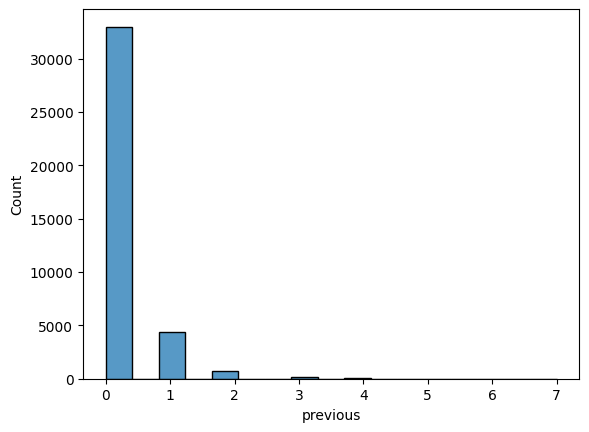

In [40]:
sns.histplot(raw_data['previous'])

<Axes: ylabel='previous'>

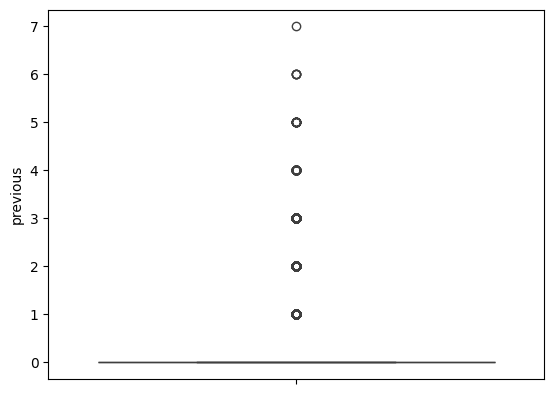

In [41]:
sns.boxplot(raw_data['previous'])

In [42]:
raw_data['previous'].describe()

count    38327.000000
mean         0.174551
std          0.493401
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [43]:
raw_data['previous'].quantile(0.99)

2.0

Видим: одни "холодные" звонки -- почти всем клиентам звонили в первый раз. 

Немного отрежем, но так, чтобы осталась какая-то информация о вторых звонках 

In [46]:
raw_data = raw_data[raw_data['previous'] <= 2.0]

<Axes: ylabel='previous'>

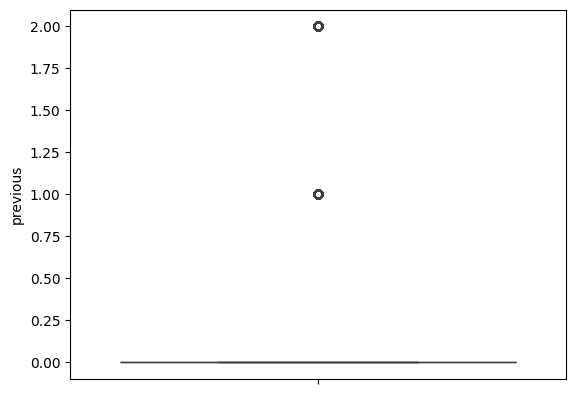

In [47]:
sns.boxplot(raw_data['previous'])

<Axes: xlabel='emp.var.rate', ylabel='Count'>

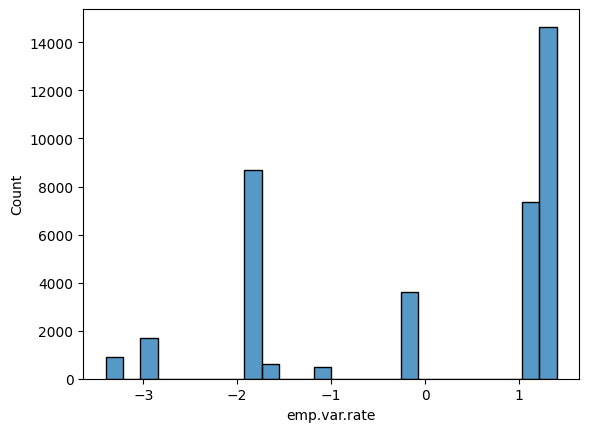

In [48]:
sns.histplot(raw_data['emp.var.rate'])

<Axes: ylabel='emp.var.rate'>

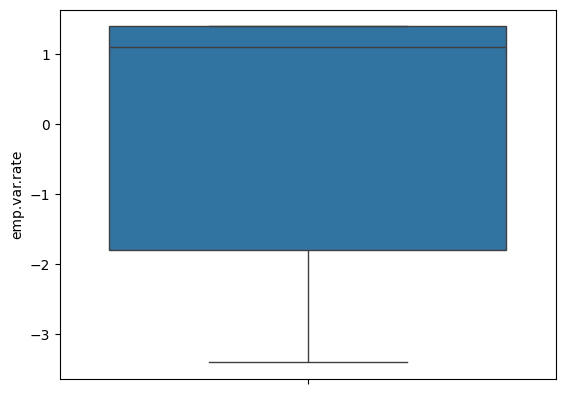

In [49]:
sns.boxplot(raw_data['emp.var.rate'])

<Axes: ylabel='emp.var.rate'>

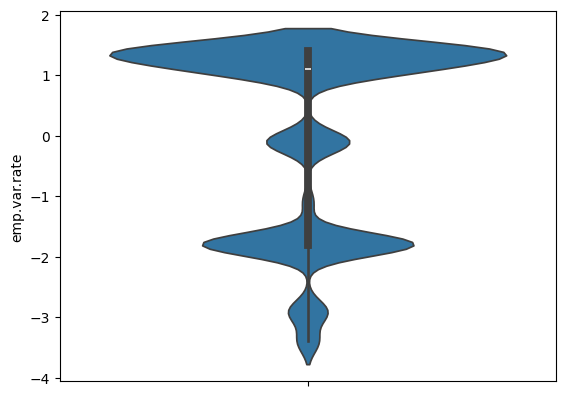

In [50]:
sns.violinplot(raw_data['emp.var.rate'])

In [51]:
raw_data['emp.var.rate'].describe()

count    38045.000000
mean         0.078231
std          1.562863
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

Видим: в большинстве случаев кампания проходила во время **роста** занятости, то есть, когда у людей есть хоть немного лишних денег

<Axes: xlabel='cons.price.idx', ylabel='Count'>

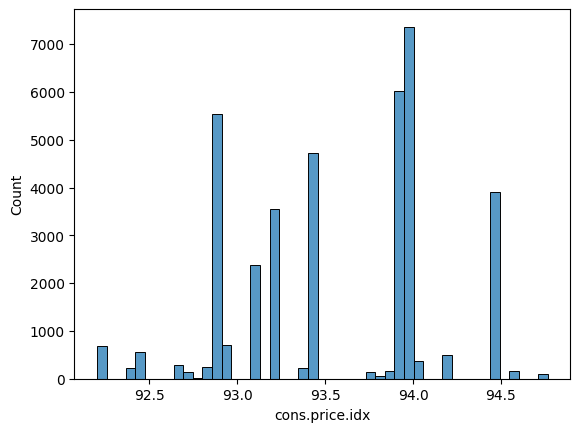

In [53]:
sns.histplot(raw_data['cons.price.idx'])

<Axes: ylabel='cons.price.idx'>

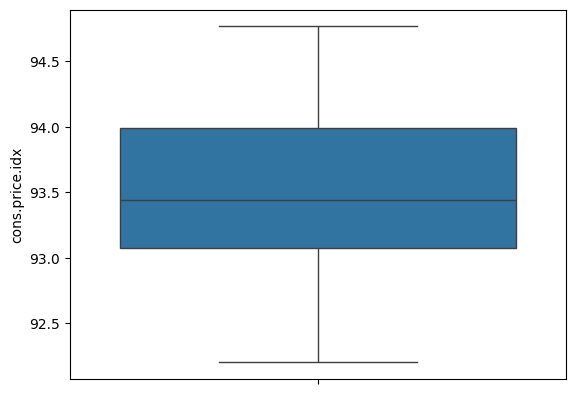

In [54]:
sns.boxplot(raw_data['cons.price.idx'])

<Axes: ylabel='cons.price.idx'>

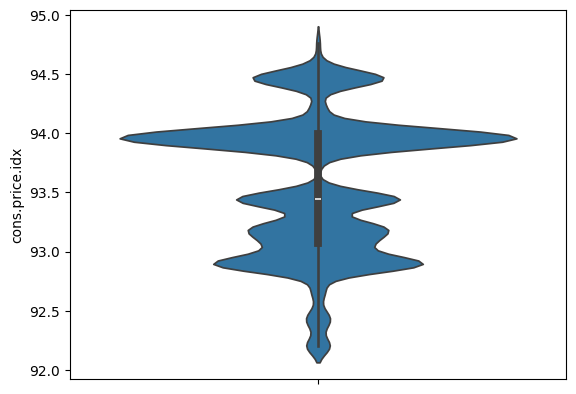

In [55]:
sns.violinplot(raw_data['cons.price.idx'])

In [56]:
raw_data['cons.price.idx'].describe()

count    38045.000000
mean        93.565390
std          0.574491
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

Видим: кампании проводили во время подешевления продуктов, то есть повышения покупательной способности клиентов

<Axes: xlabel='cons.conf.idx', ylabel='Count'>

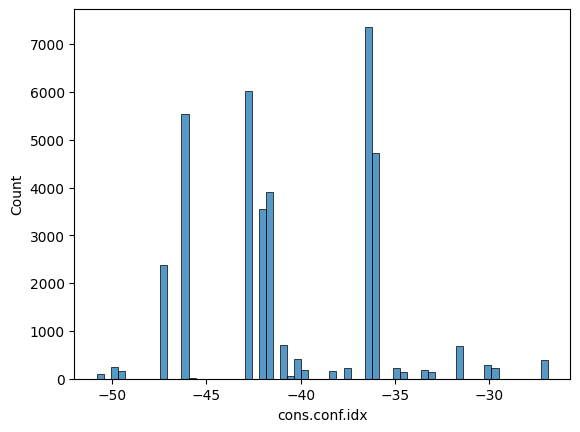

In [58]:
sns.histplot(raw_data['cons.conf.idx'])

<Axes: ylabel='cons.conf.idx'>

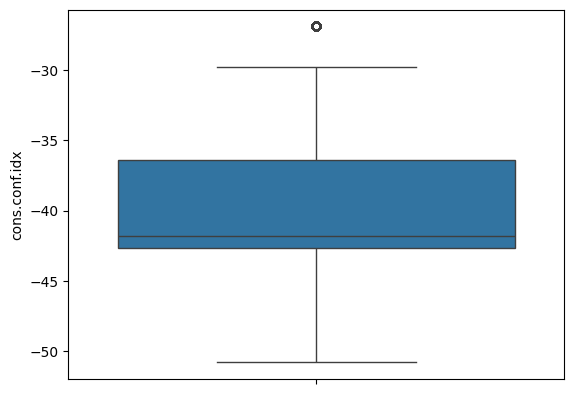

In [59]:
sns.boxplot(raw_data['cons.conf.idx'])

In [60]:
raw_data['cons.conf.idx'].describe()

count    38045.000000
mean       -40.554609
std          4.604471
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

Видим: кампания проводилась во время, когда люди много тратить не хотят, а хотят копить деньги на будущее, на чёрный день. 
Видимо, с расчётом на это и организовывались кампании.

<Axes: xlabel='euribor3m', ylabel='Count'>

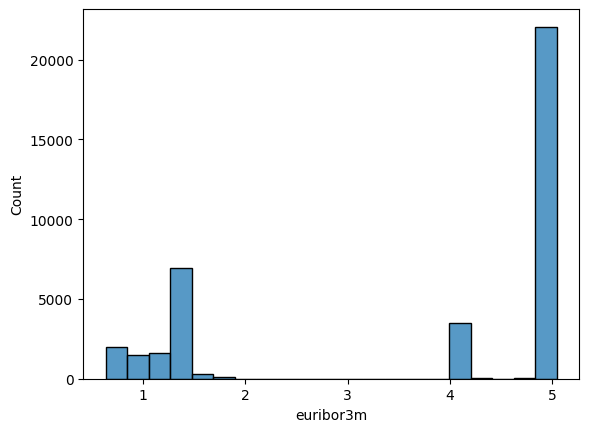

In [62]:
sns.histplot(raw_data['euribor3m'])

<Axes: ylabel='euribor3m'>

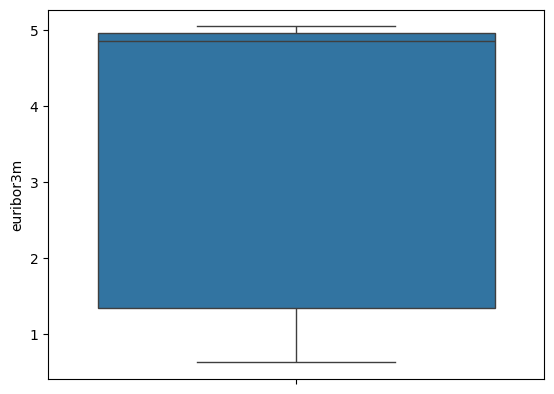

In [63]:
sns.boxplot(raw_data['euribor3m'])

<Axes: ylabel='euribor3m'>

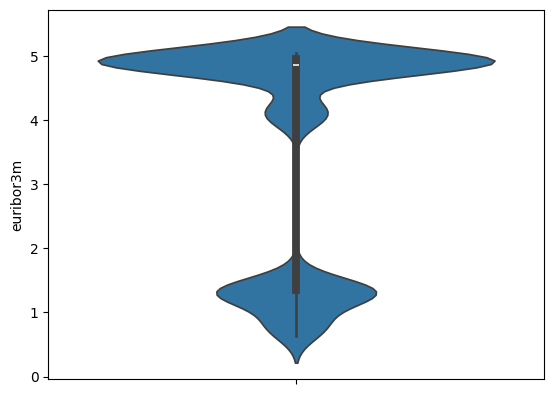

In [64]:
sns.violinplot(raw_data['euribor3m'])

In [65]:
raw_data['euribor3m'].describe()

count    38045.000000
mean         3.627786
std          1.722133
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

Видим: во время большинства кампаний европейские банки предоставляли друг другу кредиты с относительно большими процентами, 
то есть, как и люди, были не особо уверены в будущем и не хотели большого движения денежных масс. 

<Axes: xlabel='nr.employed', ylabel='Count'>

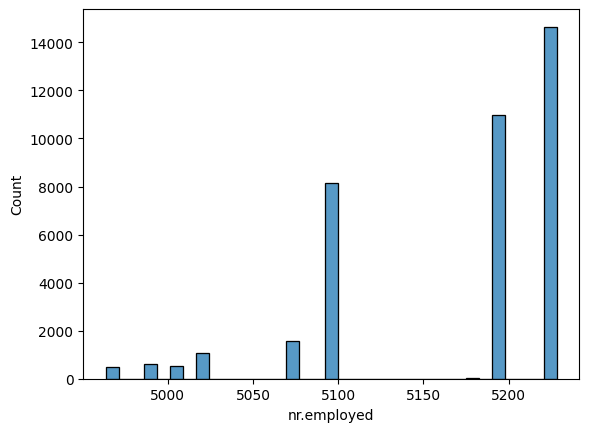

In [67]:
sns.histplot(raw_data['nr.employed'])

<Axes: ylabel='nr.employed'>

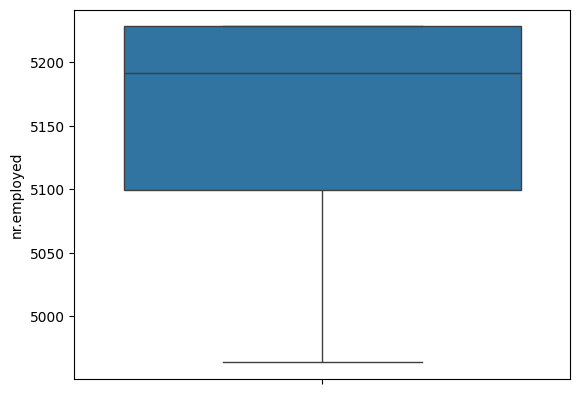

In [68]:
sns.boxplot(raw_data['nr.employed'])

In [69]:
raw_data['nr.employed'].describe()

count    38045.000000
mean      5167.880641
std         70.294414
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Видим: во все кампании в банке работало около $5000$ человек.

Статистику по категориальным переменным мы визуализируем в виде диаграммы-пирога (pie-chart)

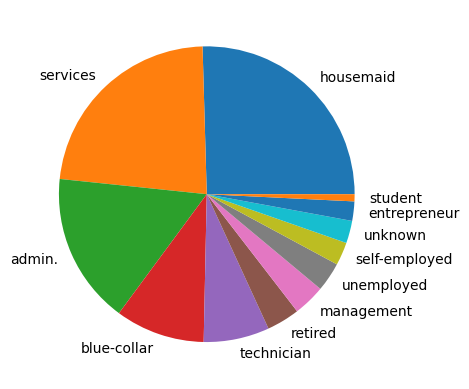

In [72]:
plt.pie(raw_data['job'].value_counts().values,labels = list(raw_data['job'].unique()))
pass

Большая часть - это домохозяйки, работники сферы услуг, управленцы и "синие воротнички" (заняты тяжёлым физическим трудом с почасовой оплатой).
Наверно, скорее соглашаются домохозяйки и управленцы, потому что сфера услуг и физический труд довольно нестабильны по оплате.

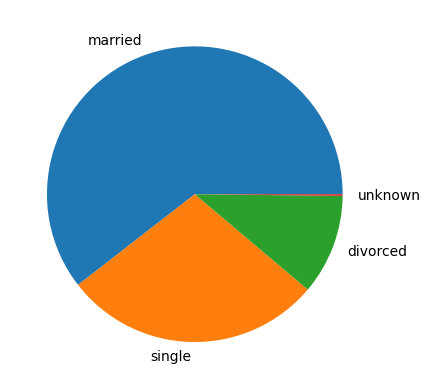

In [74]:
plt.pie(raw_data['marital'].value_counts().values,labels = list(raw_data['marital'].unique()))
pass

Большинство женаты

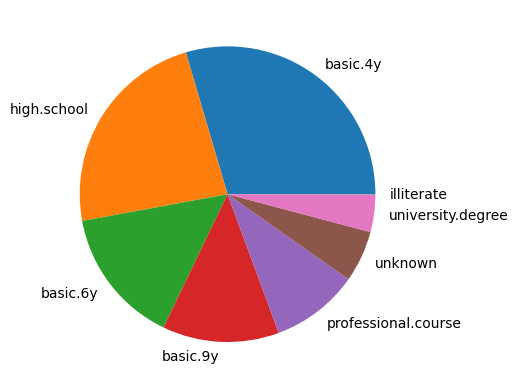

In [76]:
plt.pie(raw_data['education'].value_counts().values,labels = list(raw_data['education'].unique()))
pass

Образование, честно сказать, не очень высокого уровня. То есть, эти люди могут **слабо** разбираться в собственных финансах.

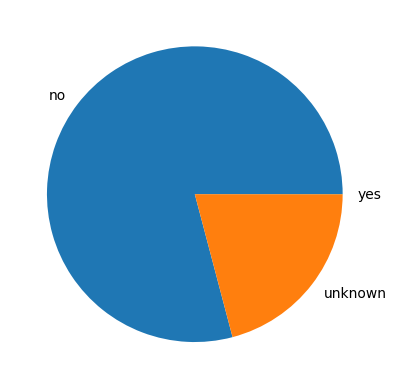

In [78]:
plt.pie(raw_data['default'].value_counts().values,labels = list(raw_data['default'].unique()))
pass

Большинство не банкротились, то есть, несмотря на слабое образование, какая-то финансовая грамотность всё таки есть.

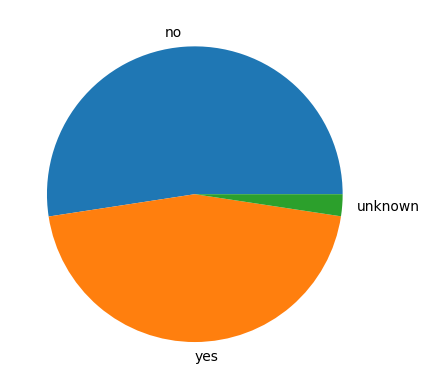

In [80]:
plt.pie(raw_data['housing'].value_counts().values,labels = list(raw_data['housing'].unique()))
pass

Примерно 50 на 50 по наличию ипотеки на недвижимость

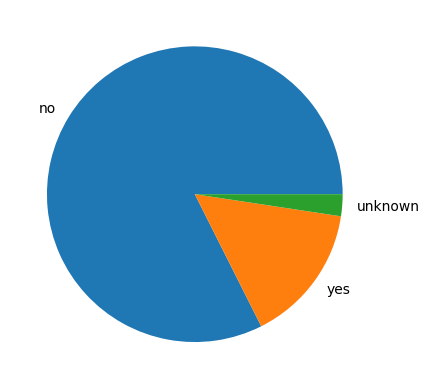

In [82]:
plt.pie(raw_data['loan'].value_counts().values,labels = list(raw_data['loan'].unique()))
pass

Точно есть финансовая грамотность -- почти у всех кредит взят лишь на дом, а живут они без кредитов

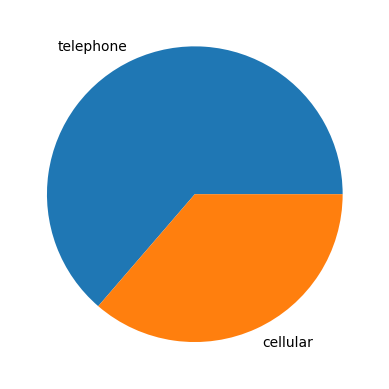

In [84]:
plt.pie(raw_data['contact'].value_counts().values,labels = list(raw_data['contact'].unique()))
pass

Большинство контактов были, как мы говорим в России, по домашнему телефону. То есть, по тому, который к проводам подключается.

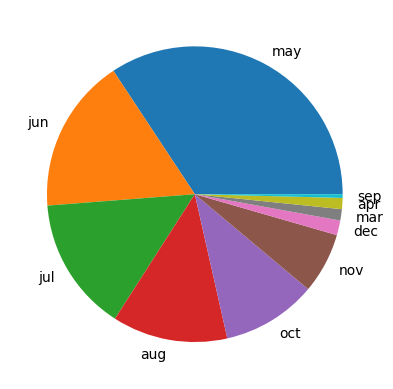

In [86]:
plt.pie(raw_data['month'].value_counts().values,labels = list(raw_data['month'].unique()))
pass

Контакты были в основом летом. Возможно, в Португалии в это время погода хорошая и у людей лучше настроение. 
Либо же большинство работников колл-центра -- это студенты, у которых летом каникулы и они подрабатывают.

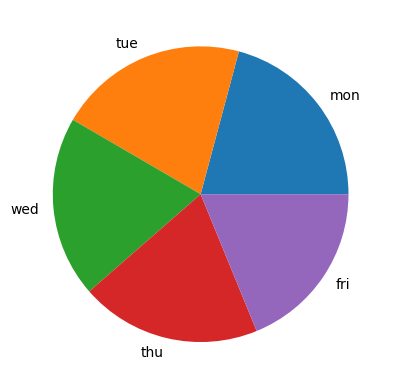

In [88]:
plt.pie(raw_data['day_of_week'].value_counts().values,labels = list(raw_data['day_of_week'].unique()))
pass

Равномерно в каждый рабочий день звонили

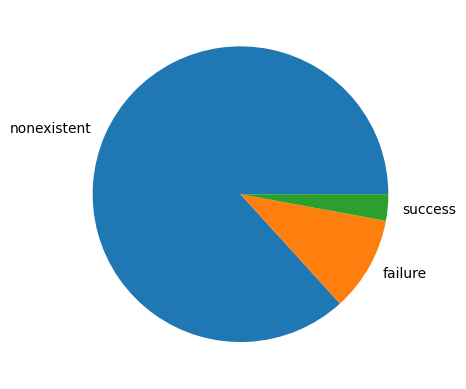

In [90]:
plt.pie(raw_data['poutcome'].value_counts().values,labels = list(raw_data['poutcome'].unique()))
pass

Большинство звонков -- в первый раз, а те, что не в первый, в основном неудачные

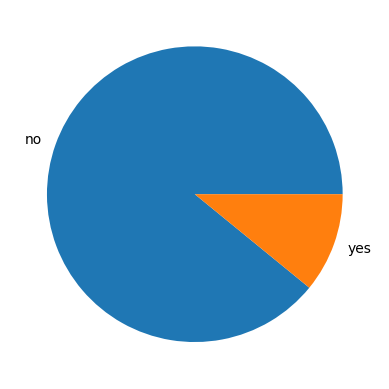

In [92]:
plt.pie(raw_data['y'].value_counts().values,labels = list(raw_data['y'].unique()))
pass

Подавляющее большинство клиентов банку **отказывают**

Построим в конце корреляционную матрицу по данным

In [95]:
for col in['campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']:
    raw_data[col] = raw_data[col].astype('float32')

In [96]:
corr_mat = raw_data.corr(numeric_only=True)

In [97]:
corr_mat

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.009680,0.001471,-0.015174,0.065465,0.034339,0.106215,0.078234,0.061993
campaign,0.009680,1.000000,0.040979,-0.060238,0.096735,0.075677,-0.018269,0.080381,0.091847
pdays,0.001471,0.040979,1.000000,-0.510489,0.255319,0.103179,-0.089971,0.270266,0.331879
previous,-0.015174,-0.060238,-0.510489,1.000000,-0.448548,-0.290357,-0.083045,-0.463635,-0.476753
emp.var.rate,0.065465,0.096735,0.255319,-0.448548,1.000000,0.787902,0.228767,0.972902,0.911803
cons.price.idx,0.034339,0.075677,0.103179,-0.290357,0.787902,1.000000,0.092406,0.707747,0.550822
cons.conf.idx,0.106215,-0.018269,-0.089971,-0.083045,0.228767,0.092406,1.000000,0.308927,0.127607
euribor3m,0.078234,0.080381,0.270266,-0.463635,0.972902,0.707747,0.308927,1.000000,0.946113
nr.employed,0.061993,0.091847,0.331879,-0.476753,0.911803,0.550822,0.127607,0.946113,1.000000


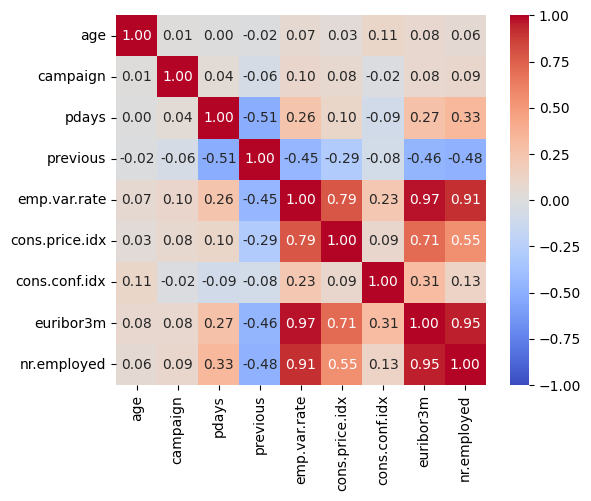

In [98]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

In [99]:
abs(corr_mat) > 0.5

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,True,False,False,False,False,False,False,False,False
campaign,False,True,False,False,False,False,False,False,False
pdays,False,False,True,True,False,False,False,False,False
previous,False,False,True,True,False,False,False,False,False
emp.var.rate,False,False,False,False,True,True,False,True,True
cons.price.idx,False,False,False,False,True,True,False,True,True
cons.conf.idx,False,False,False,False,False,False,True,False,False
euribor3m,False,False,False,False,True,True,False,True,True
nr.employed,False,False,False,False,True,True,False,True,True


Что видно по корреляциям: почти ничего ни с чем не коррелирует. То, что pdays коррелирует с previous, вообще очевидно,
потому что они оба принимают почти константные значения. Корреляция всяких индексов занятости и покупательной способности также понятна. 
То есть, рассматриваемые величины практически независимы. 

<a id='3'></a>
3. *Обработать пропущенные значения (или убедиться, что их нет)*
[Обратно в меню](#-1)

Посмотрим, сколько у нас вообще пропущенных значений

In [103]:
raw_data[raw_data.apply(lambda row: row.astype(str).str.contains('unknown').any(), axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.000000,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.000000,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.000000,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.000000,no
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,1.0,999.0,0.0,nonexistent,1.1,93.994003,-36.400002,4.857,5191.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,2.0,999.0,2.0,failure,-1.1,94.766998,-50.799999,1.046,4963.600098,no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,2.0,999.0,0.0,nonexistent,-1.1,94.766998,-50.799999,1.046,4963.600098,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,3.0,999.0,0.0,nonexistent,-1.1,94.766998,-50.799999,1.046,4963.600098,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,1.0,999.0,1.0,failure,-1.1,94.766998,-50.799999,1.041,4963.600098,no


Ох, их четверть от всех. Точно надо чем-то заменить, а не удалять. Используем импутатор

In [105]:
cols = raw_data.columns

In [106]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values='unknown', strategy="most_frequent")
imp_num.fit(raw_data)

SimpleImputer(missing_values='unknown', strategy='most_frequent')

In [107]:
raw_data = pd.DataFrame(imp_num.transform(raw_data))

In [108]:
raw_data.columns = cols

In [109]:
raw_data[raw_data.apply(lambda row: row.astype(str).str.contains('unknown').any(), axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


Теперь пропущенные значения заменены самыми частыми

<a id='4'></a>
4. *Обработать категориальные признаки*
[Обратно в меню](#-1)

Приведём категориальные переменные к соответствующему типу

In [113]:
for col_name in ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'y']:
    raw_data[col_name] = raw_data[col_name].astype('category')

In [114]:
raw_data['job'].dtype

CategoricalDtype(categories=['admin.', 'blue-collar', 'entrepreneur', 'housemaid',
                  'management', 'retired', 'self-employed', 'services',
                  'student', 'technician', 'unemployed'],
, ordered=False, categories_dtype=object)

Теперь используем one-hot-encoding

In [116]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)

In [117]:
X = raw_data.drop(['y'],axis = 1)

In [118]:
enc.fit(X[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [119]:
dummies = pd.DataFrame(enc.transform(X[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']]),
                       columns=enc.get_feature_names_out(), index=X.index)
dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [120]:
X = pd.concat((X, dummies), axis=1).drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'], axis=1)
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1.0,999.0,0.0,1.1,93.994003,-36.400002,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,1.0,999.0,0.0,1.1,93.994003,-36.400002,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1.0,999.0,0.0,1.1,93.994003,-36.400002,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,1.0,999.0,0.0,1.1,93.994003,-36.400002,4.857,5191.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,1.0,999.0,0.0,1.1,93.994003,-36.400002,4.857,5191.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<a id='5'></a>
5. *Провести нормализацию (или объяснить, почему в вашем случае она не нужна)*
[Обратно в меню](#-1)

Нормализация конечно же нужна. 

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [124]:
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [125]:
X

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.698707,-0.818022,0.178752,-0.371813,0.653789,0.746085,0.902310,0.713784,0.328897,-0.596325,...,-0.127864,-0.110873,-0.481319,1.949365,-0.512088,-0.496424,-0.497041,-0.340083,0.390908,-0.172471
1,1.802230,-0.818022,0.178752,-0.371813,0.653789,0.746085,0.902310,0.713784,0.328897,-0.596325,...,-0.127864,-0.110873,-0.481319,1.949365,-0.512088,-0.496424,-0.497041,-0.340083,0.390908,-0.172471
2,-0.268226,-0.818022,0.178752,-0.371813,0.653789,0.746085,0.902310,0.713784,0.328897,-0.596325,...,-0.127864,-0.110873,-0.481319,1.949365,-0.512088,-0.496424,-0.497041,-0.340083,0.390908,-0.172471
3,0.042342,-0.818022,0.178752,-0.371813,0.653789,0.746085,0.902310,0.713784,0.328897,1.676939,...,-0.127864,-0.110873,-0.481319,1.949365,-0.512088,-0.496424,-0.497041,-0.340083,0.390908,-0.172471
4,1.698707,-0.818022,0.178752,-0.371813,0.653789,0.746085,0.902310,0.713784,0.328897,-0.596325,...,-0.127864,-0.110873,-0.481319,1.949365,-0.512088,-0.496424,-0.497041,-0.340083,0.390908,-0.172471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38040,-0.268226,-0.818022,0.178752,-0.371813,-0.753903,2.091632,-2.225125,-1.509651,-2.906111,1.676939,...,-0.127864,-0.110873,2.077623,-0.512987,-0.512088,-0.496424,-0.497041,-0.340083,0.390908,-0.172471
38041,-1.096408,-0.818022,-5.577490,2.095591,-0.753903,2.091632,-2.225125,-1.509651,-2.906111,-0.596325,...,-0.127864,-0.110873,2.077623,-0.512987,-0.512088,-0.496424,-0.497041,-0.340083,-2.558148,5.798089
38042,0.663479,-0.818022,0.178752,-0.371813,-0.753903,2.091632,-2.225125,-1.509651,-2.906111,-0.596325,...,-0.127864,-0.110873,2.077623,-0.512987,-0.512088,-0.496424,-0.497041,-0.340083,0.390908,-0.172471
38043,1.698707,-0.038558,0.178752,-0.371813,-0.753903,2.091632,-2.225125,-1.509651,-2.906111,-0.596325,...,-0.127864,-0.110873,2.077623,-0.512987,-0.512088,-0.496424,-0.497041,-0.340083,0.390908,-0.172471


<a id='6'></a>
6. *Разбить данные на обучающую и тестовую выборки*
[Обратно в меню](#-1)

In [127]:
y = raw_data['y'].map({'yes': 1.0, 'no': 0.0})

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

<a id='7'></a>
7. *Запустить классификатор (ререссию) ближайших соседей или другой метод (аргументируйте выбор!)*
[Обратно в меню](#-1)

Что известно о задаче к текущему моменту:
1. Размерность огромна
2. Переменные почти не коррелированы между собой
   
Задача бинарной классицикации состоит в построении гиперповерхности, разделяющей $2$ многообразия.
Исходя из отсутствия корреляции, можно предположить, что для разделения годится гиперплоскость. 
То есть, попробуем Машину Опорных Векторов с линейным ядром.

In [131]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=1, tol=1e-5)

In [132]:
svc.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=1, tol=1e-05)

F1-score на обучающей выборке

In [134]:
from sklearn.metrics import f1_score
f1_score(svc.predict(X_train), y_train, average='binary')

0.30341775264322596

F1-score на тестовой выборке

In [136]:
f1_score(svc.predict(X_test), y_test, average='binary')

0.29316960859554875

Теперь попробуем метод ближайших соседей 

In [138]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)

In [139]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

F1-score на обучающей выборке

In [141]:
f1_score(neigh.predict(X_train), y_train, average='binary')

0.4297918948521358

F1-score на тестовой выборке

In [143]:
f1_score(neigh.predict(X_test), y_test, average='binary')

0.3095723014256619

Подберём гиперпараметр

In [145]:
K = range(1,60)
scores = []

max_score = -10
k_max_score = 0
for k in K:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    scr = f1_score(neigh.predict(X_test), y_test, average='binary')
    if(scr > max_score):
        max_score = scr
        k_max_score = k
    scores.append(scr)

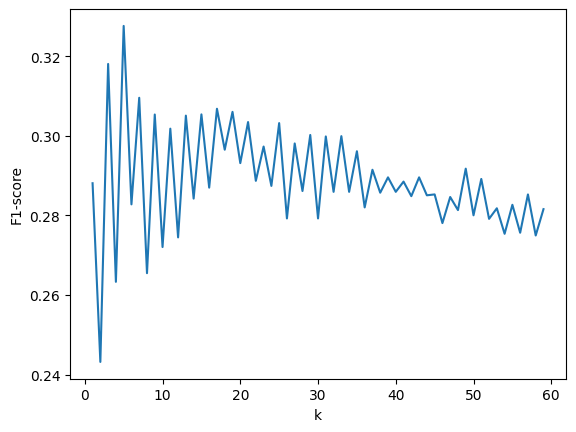

In [146]:
plt.plot(K,scores)
plt.xlabel('k')
plt.ylabel('F1-score')
pass

In [147]:
print(max_score,k_max_score)

0.32763157894736844 5


In [148]:
neigh = KNeighborsClassifier(n_neighbors=k_max_score)
neigh.fit(X_train,y_train)

KNeighborsClassifier()

In [149]:
f1_score(neigh.predict(X_train), y_train, average='binary')

0.46319414550150667

In [150]:
f1_score(neigh.predict(X_test), y_test, average='binary')

0.32763157894736844

In [151]:
from sklearn.metrics import roc_curve,auc

Построим кривую ROC для подобранного метода

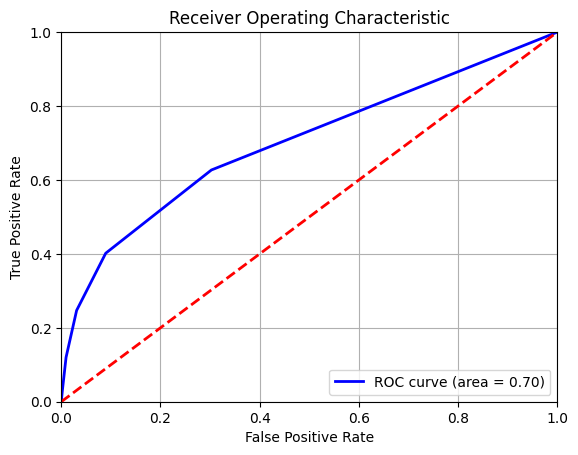

In [153]:
y_scores = neigh.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

# 5. Вычисляем TPR и FPR для ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# 6. Вычисляем площадь под ROC-кривой
roc_auc = auc(fpr, tpr)

# 7. Строим ROC-кривую
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Вывод**: модель чему-то обучилась и смогла распространить свои знания на тестовую выборку. Однако хотелось бы результат лучше, поэтому попробуем использовать ансамблевые классификаторы

In [155]:
from sklearn.ensemble import RandomForestClassifier
N = range(1,60)
scores = []

max_score = -10
n_max_score = 0
for n in N:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train,y_train)
    scr = f1_score(clf.predict(X_test), y_test, average='binary')
    if(scr > max_score):
        max_score = scr
        n_max_score = n
    scores.append(scr)

In [156]:
print(max_score,n_max_score)

0.3655514250309789 9


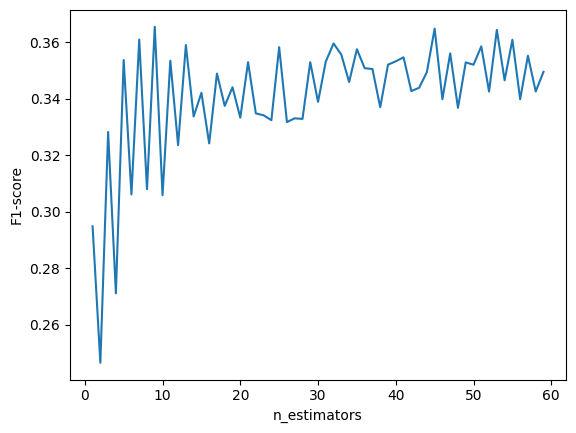

In [157]:
plt.plot(N,scores)
plt.xlabel('n_estimators')
plt.ylabel('F1-score')
pass

Попробуем понизить размерность до 2 через анализ главных компонент (PCA), чтобы посмотреть, что же творится.

In [159]:
from sklearn.decomposition import PCA
principal=PCA(n_components=2,svd_solver='randomized')
principal.fit(X)
trf = principal.transform(X)

In [160]:
trf.shape

(38045, 2)

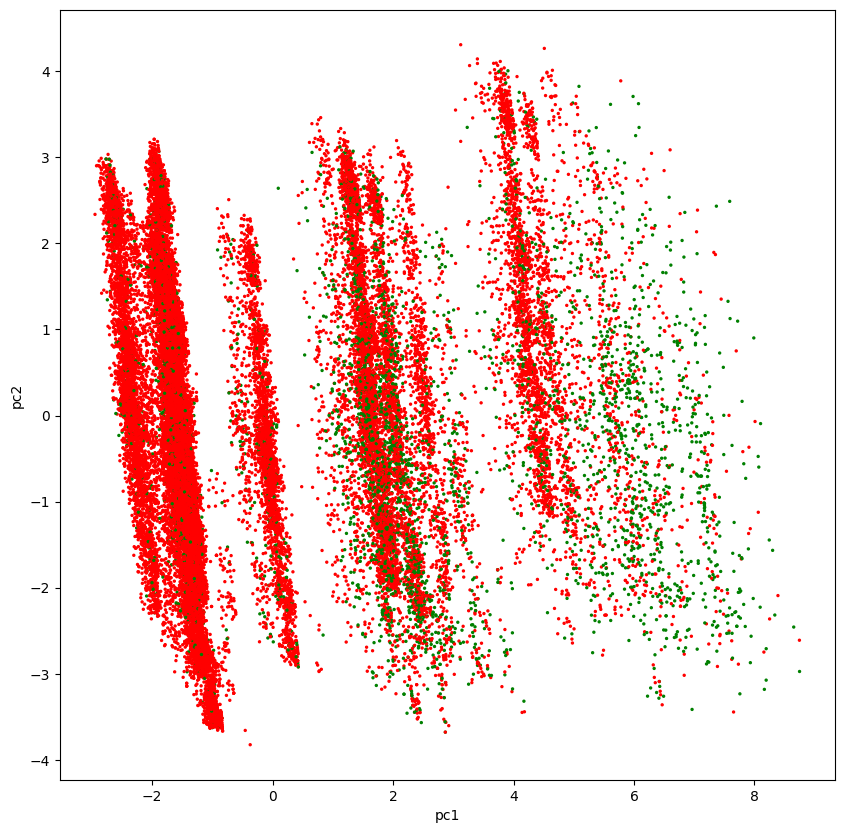

In [161]:

plt.figure(figsize=(10,10))
plt.scatter(trf[:,0],trf[:,1],c=["r" if val == 0.0 else "g" for val in y],s = 2.0)
plt.xlabel('pc1')
plt.ylabel('pc2')
pass

Мы видим, что данные действительно имеют какую-то стуктуру, которую можно было бы использовать.
Возможно, больше всего нам мешает несбалансированность классов. 
Воспользуемся техникой SMOTE (Synthetic Minority Over-sampling Technique), чтобы перебалансировать классы. 

In [163]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [164]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 42)

In [165]:
K = range(1,60)
scores = []

max_score = -10
k_max_score = 0
for k in K:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_res_train,y_res_train)
    scr = f1_score(neigh.predict(X_res_test), y_res_test, average='binary')
    if(scr > max_score):
        max_score = scr
        k_max_score = k
    scores.append(scr)

In [166]:
print(max_score,k_max_score)

0.9167942827973455 1


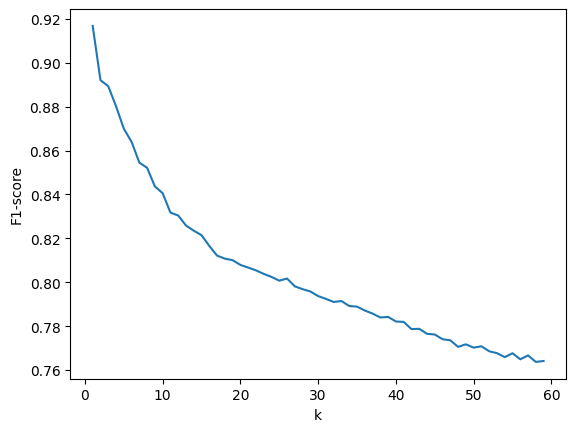

In [167]:
plt.plot(K,scores)
plt.xlabel('k')
plt.ylabel('F1-score')
pass

F1 получилось лучше, но $1$ сосед -- это, конечно, немного странно.

In [169]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_res_train,y_res_train)

KNeighborsClassifier(n_neighbors=1)

In [170]:
f1_score(neigh.predict(X_res_train), y_res_train, average='binary')

0.9965223883529482

In [171]:
f1_score(neigh.predict(X_res_test), y_res_test, average='binary')

0.9167942827973455

In [172]:
from sklearn.ensemble import RandomForestClassifier
N = range(1,60)
scores = []

max_score = -10
n_max_score = 0
for n in N:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train,y_train)
    scr = f1_score(clf.predict(X_res_test), y_res_test, average='binary')
    if(scr > max_score):
        max_score = scr
        n_max_score = n
    scores.append(scr)

In [173]:
print(max_score,n_max_score)

0.7614552320092949 43


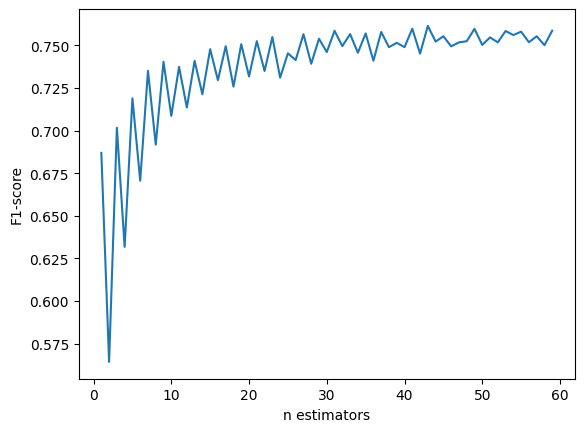

In [174]:
plt.plot(K,scores)
plt.xlabel('n estimators')
plt.ylabel('F1-score')
pass

In [175]:
svc = LinearSVC()

In [176]:
svc.fit(X_res_train,y_res_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [177]:
f1_score(svc.predict(X_res_test),y_res_test)

0.7028500941375057

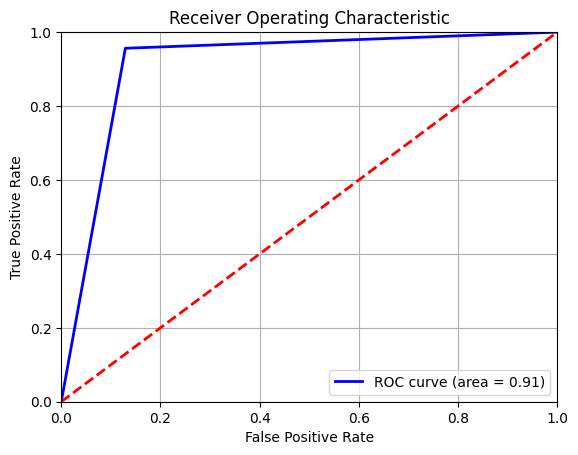

In [178]:
y_scores = neigh.predict_proba(X_res_test)[:, 1]  # Вероятности для положительного класса

# 5. Вычисляем TPR и FPR для ROC
fpr, tpr, thresholds = roc_curve(y_res_test, y_scores)

# 6. Вычисляем площадь под ROC-кривой
roc_auc = auc(fpr, tpr)

# 7. Строим ROC-кривую
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Более-менее хороший результат

[Text(0, 0.5, 'n'), Text(0, 1.5, 'y')]

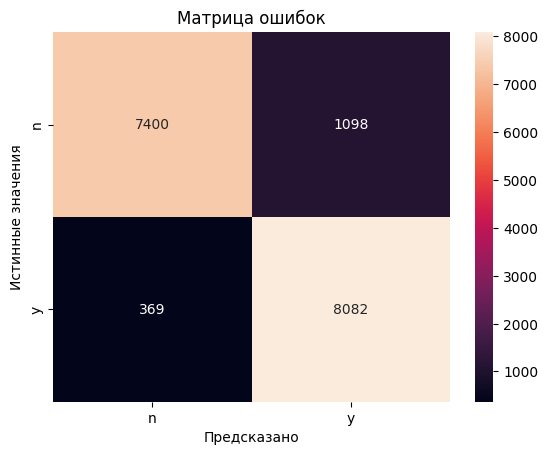

In [180]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_res_test, neigh.predict(X_res_test))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Предсказано');ax.set_ylabel('Истинные значения') 
ax.set_title('Матрица ошибок');
ax.xaxis.set_ticklabels(['n', 'y']); ax.yaxis.set_ticklabels(['n', 'y'])

Видим, что из-за оверсэмплинга модель выдаёт больше ложно положительных, чем ложно отрицательных ответов.

Под конец попробуем другую версию SMOTE

In [183]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [184]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 42)

In [185]:
K = range(1,10)
scores = []

max_score = -10
k_max_score = 0
for k in K:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_res_train,y_res_train)
    scr = f1_score(neigh.predict(X_res_test), y_res_test, average='binary')
    if(scr > max_score):
        max_score = scr
        k_max_score = k
    scores.append(scr)

In [186]:
print(max_score,k_max_score)

0.918021603183627 1


Результат сильно не поменялся.

**CatBoost**

In [189]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=10_000,task_type="GPU",eval_metric="F1")
model.fit(X_res_train,y_res_train)

Learning rate set to 0.003452
0:	learn: 0.7149147	total: 39.4ms	remaining: 6m 33s
1:	learn: 0.6888867	total: 50.6ms	remaining: 4m 12s
2:	learn: 0.7834550	total: 61.8ms	remaining: 3m 26s
3:	learn: 0.7838794	total: 73.4ms	remaining: 3m 3s
4:	learn: 0.7818174	total: 85.5ms	remaining: 2m 50s
5:	learn: 0.7814825	total: 99ms	remaining: 2m 44s
6:	learn: 0.7836412	total: 111ms	remaining: 2m 38s
7:	learn: 0.7832384	total: 123ms	remaining: 2m 33s
8:	learn: 0.7811088	total: 135ms	remaining: 2m 29s
9:	learn: 0.7811088	total: 147ms	remaining: 2m 26s
10:	learn: 0.7811088	total: 159ms	remaining: 2m 24s
11:	learn: 0.7815449	total: 171ms	remaining: 2m 22s
12:	learn: 0.7835989	total: 183ms	remaining: 2m 20s
13:	learn: 0.7829893	total: 195ms	remaining: 2m 19s
14:	learn: 0.7836677	total: 206ms	remaining: 2m 17s
15:	learn: 0.7895719	total: 217ms	remaining: 2m 15s
16:	learn: 0.8024597	total: 228ms	remaining: 2m 13s
17:	learn: 0.8148419	total: 239ms	remaining: 2m 12s
18:	learn: 0.8143318	total: 250ms	remaini

In [190]:
from sklearn.metrics import f1_score
f1_score(model.predict(X_res_test),y_res_test,average="binary")

0.9374573854831711

**Сравнение методов**

In [323]:

table1 = [["k-means", 0.32763157894736844,0.916907719357949],
         ["LinearSVC", 0.29316960859554875,0.7007832898172324],
         ["RandomForest", 0.36363636363636365,0.7610683698650021],
         ["CatBoost","-",0.9374573854831711]]

In [325]:
pd.DataFrame(table1,columns=["Метод","Лучший F1-score (до оверсэмплинга)","Лучший F1-score (после оверсэмплинга)" ])

,Метод,Лучший F1-score (до оверсэмплинга),Лучший F1-score (после оверсэмплинга)
0,k-means,0.327632,0.916908
1,LinearSVC,0.29317,0.700783
2,RandomForest,0.363636,0.761068
3,CatBoost,-,0.937457


Отметим, что полученный в итоге F1-score сопоставим с результатами других на kaggle.[https://www.kaggle.com/code/henriqueyamahata/bank-marketing-classification-roc-f1-recall#Other-attributes]

[Обратно в меню](#-1)
<a id='10'></a>
**Общие выводы**: 
- данные страдают от несбалансированности классов
- при помощи оверсэмплинга (SMOTE) удалось достичь F1-score $0.937457$
- лучшим оказался метод CatBoost с F1-score $0.937457$
- Худшим оказался метод LinearSVC с F1-score $0.700783$
- PCA помог понять, что в данных есть какая-то **структура**
- Выбрасывание коррелированных величин в данном случае **ухудшает** результаты!